In [1]:
import pandas as pd

## ChatSimulator

In [22]:
data = pd.read_csv('chatbot_variants.csv', index_col=0)
data["Turns"] = data["Turns"].apply(eval)
version_name = {'v'+str(i): ["Vanilla", "Prompt-Engineered", "EditorBot", "FactChecker", "AgentBot", "Detectorbased"][i] for i in range(6)}
data

,Chat,Turns,Analysis_Combined,Result,Version
0,AI: Hi! I am your consumer grievance assistanc...,{1: {'context': ' Document 0: 5 of the Consume...,Turn 1\nInconsistencies Present: Yes\nInconsis...,Inconsistencies detected: Yes. \nThe following...,v0
1,AI: Hi! I am your consumer grievance assistanc...,"{1: {'context': ' Document 0: products, etc. 1...",Turn 1\nInconsistencies Present: No\nTurn 2\nI...,Inconsistencies detected: No.,v0
2,AI: Hi! I am your consumer grievance assistanc...,"{1: {'context': ' Document 0: of the product, ...",Turn 1\nInconsistencies Present: No\nTurn 2\nI...,Inconsistencies detected: No.,v0
3,AI: Hi! I am your consumer grievance assistanc...,{1: {'context': ' Document 0: boarding to ...,Turn 1\nInconsistencies Present: No\nTurn 2\nI...,Inconsistencies detected: No.,v0
4,AI: Hi! I am your consumer grievance assistanc...,{1: {'context': ' Document 0: being used in an...,Turn 3\nInconsistencies Present: Yes\nInconsis...,Inconsistencies detected: Yes.\nThe following ...,v0
...,...,...,...,...,...
145,AI: Hi! I am your consumer grievance assistanc...,"{1: {'context': ' Document 0: cap, and for any...",Turn 2\nInconsistencies Present: Yes\nInconsis...,Inconsistencies detected: Yes. \nThe following...,v4
146,Chatbot: Hi! I am your consumer grievance assi...,{},Turn 1\nInconsistencies Present: No\nTurn 2\nI...,Inconsistencies detected: No.,v4
147,AI: Hi! I am your consumer grievance assistanc...,{1: {'context': ' Document 0: consumer has rig...,Turn 2\nInconsistencies Present: Yes\nInconsis...,Inconsistencies detected: Yes.\nThe following ...,v4
148,AI: Hi! I am your consumer grievance assistanc...,{1: {'context': ' Document 0: handles consumer...,Turn 1\nInconsistencies Present: No\nTurn 2\nI...,Inconsistencies detected: No.,v4


In [ ]:
import nltk
nltk.download('punkt')  # Make sure to download the necessary data for tokenization

from nltk.tokenize import word_tokenize

def count_tokens(sentence):
    # Tokenize the sentence
    tokens = word_tokenize(sentence)
    # Return the number of tokens
    return len(tokens)


data["Turn Count"] = data["Turns"].apply(len)
# data["Hallucination Count"] = data["Result"].apply(count_points)
data['response_tokens'] = data['Turns'].apply(lambda x: count_tokens(" ".join([v['response'] for k,v in x.items()])))
data_group = data.groupby("Version")
temp = pd.DataFrame({"Mean No of Turns": data_group["Turn Count"].mean(), "Std of No of Turns": data_group["Turn Count"].std(),
                        "Mean No of Tokens": data_group["response_tokens"].mean(), "Std of No of Tokens": data_group["response_tokens"].std(),})
temp.reset_index(inplace=True)
temp["Version"] = temp["Version"].map(version_name)
temp

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\spand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Version,Mean No of Turns,Std of No of Turns,Mean No of Tokens,Std of No of Tokens
0,Vanilla,3.133333,1.634400,782.633333,458.897967
1,Prompt-Engineered,3.233333,1.330889,850.266667,356.854740
2,EditorBot,3.433333,1.194335,813.966667,408.665573
3,FactChecker,3.366667,1.351457,860.800000,383.181545
4,AgentBot,3.466667,1.479360,999.000000,366.966408


In [ ]:
data_group

In [32]:
def convert_df_to_latex(df):
    # Start the LaTeX table
    latex_code = """
    \\begin{table*}[!htpb]
        \\centering
        \\caption{}
        \\begin{tabular}{|""" + "c|" * len(df.columns) + """}
            \\hline
    """
    
    # Add header row (bold)
    header_row = " & ".join([f"\\textbf{{{col}}}" for col in df.columns])
    latex_code += f"        {header_row} \\\\ \n"
    latex_code += "        \\hline\n"
    
    # Add data rows, format based on column type
    for index, row in df.iterrows():
        formatted_row = []
        for col in df.columns:
            if isinstance(row[col], float):
                formatted_row.append(f"{row[col]:.2f}")  # Format float values to 2 decimal places
            else:
                formatted_row.append(f"{row[col]}")  # Keep string values as they are
        latex_code += "        " + " & ".join(formatted_row) + " \\\\ \n"
        latex_code += "        \\hline\n"
    
    # End the LaTeX table
    latex_code += """
        \\end{tabular}
        \\label{tab:chatbot_comparison}
    \\end{table*}
    """
    
    return latex_code
print(convert_df_to_latex(temp))


    \begin{table*}[!htpb]
        \centering
        \caption{}
        \begin{tabular}{|c|c|c|c|c|}
            \hline
            \textbf{Version} & \textbf{Mean No of Turns} & \textbf{Std of No of Turns} & \textbf{Mean No of Tokens} & \textbf{Std of No of Tokens} \\ 
        \hline
        Vanilla & 3.13 & 1.63 & 782.63 & 458.90 \\ 
        \hline
        Prompt-Engineered & 3.23 & 1.33 & 850.27 & 356.85 \\ 
        \hline
        EditorBot & 3.43 & 1.19 & 813.97 & 408.67 \\ 
        \hline
        FactChecker & 3.37 & 1.35 & 860.80 & 383.18 \\ 
        \hline
        AgentBot & 3.47 & 1.48 & 999.00 & 366.97 \\ 
        \hline

        \end{tabular}
        \label{tab:chatbot_comparison}
    \end{table*}
    


In [83]:
text = "Given the chat history and the latest user statement (Query) which might refer to the chat history, formulate a standalone statement which can be understood without the chat history. Do NOT answer the Query, just reformulate the Query only if needed and otherwise return it as it is. The query can either be a question or a answer so ensure you reformulate it properly in both cases\n\nExample 1\nChat History:\nHuman: What is Task Decomposition?\nAI: Task Decomposition is the process of breaking down a complex task into smaller and simpler steps. This is achieved through a technique called Chain of Thought (CoT), which instructs the model to \"think step by step\" and utilize more test-time computation to transform big tasks into multiple manageable tasks.\nHuman: Can you provide an example of Chain of Thought reasoning?\nAI: Sure! Let’s say the task is to determine how many apples are left in a basket after some have been eaten. The Chain of Thought reasoning would involve steps like calculating the original number of apples, subtracting the number eaten, and arriving at the final count.\nStatement: What are the advantages of using this approach?\nReformulated Statement: What are the advantages of using Chain of Thought reasoning?<|end_of_text|\n\nExample 2\nChat History:\nHuman: What is the principle of stare decisis in law?\nAI: The principle of stare decisis refers to the legal doctrine of adhering to precedent, where courts are bound to follow the decisions of higher courts in similar cases to ensure consistency and predictability in the legal system.\nHuman: Can you explain why it is important in the judicial process?\nAI: Stare decisis is important because it promotes legal stability, predictability, and fairness. It ensures that similar cases are treated alike, reduces judicial arbitrariness, and helps individuals and businesses understand their legal obligations.\nStatement: What are some exceptions to this principle?\nReformulated Statement: What are some exceptions to the principle of stare decisis?<|end_of_text|\n\nExample 3\nChat History:\nHuman: What is a contract?\nAI: A contract is a legally enforceable agreement between two or more parties that creates mutual obligations. It requires an offer, acceptance, consideration, and the intention to create legal relations to be valid.\nHuman: What happens if one party breaches a contract?\nAI: If one party breaches a contract, the other party may seek remedies such as damages, specific performance, or rescission, depending on the terms of the contract and the severity of the breach.\nStatement: Can you explain the difference between damages and specific performance?\nReformulated Statement: Can you explain the difference between damages and specific performance as remedies for a contract breach?<|end_of_text|\n\nExample 4\nChat History:\nHuman: What is photosynthesis?\nAI: Photosynthesis is the process by which green plants, algae, and some bacteria convert sunlight, carbon dioxide, and water into glucose and oxygen. It takes place in the chloroplasts of cells and is essential for the survival of most life on Earth.\nHuman: What are the main stages involved?\nAI: The main stages are the light-dependent reactions, where sunlight is absorbed to produce ATP and NADPH, and the Calvin cycle, where carbon dioxide is fixed into glucose using ATP and NADPH.\nStatement: What factors can affect this process?\nReformulated Statement: What factors can affect the process of photosynthesis?<|end_of_text|\n\nExample 5\nChat History:\nHuman: What is intellectual property law?\nAI: Intellectual property law protects creations of the mind, such as inventions, literary and artistic works, designs, symbols, names, and images. It provides creators exclusive rights to use and benefit from their creations for a certain period.\nHuman: What are the different types of intellectual property?\nAI: The main types are patents (inventions), copyrights (creative works), trademarks (brand identifiers), and trade secrets (confidential business information).\nStatement: How do trademarks differ from copyrights?\nReformulated Statement: How do trademarks differ from copyrights under intellectual property law?<|end_of_text|\n\nExample 6\nChat History:\nHuman: Can you explain what a supply chain is?\nAI: A supply chain is a network of individuals, organizations, resources, and technologies involved in creating and delivering a product or service, from raw materials to the end customer.\nHuman: What are the key components of a supply chain?\nAI: Key components include sourcing raw materials, manufacturing, warehousing, transportation, inventory management, and distribution.\nStatement: What are the main challenges in managing it?\nReformulated Statement: What are the main challenges in managing a supply chain?<|end_of_text|\n\nExample 7\nChat History:\nHuman: What happens if someone breaches a contract?\nAI: If someone breaches a contract, remedies are available depending on the circumstances. Common remedies include damages, specific performance, or rescission. To help further, what remedy do you want to pursue in this situation?\nStatement: Monetary compensation.\nReformulated Statement: The remedy the user wants to pursue is monetary compensation.<|end_of_text|\n\nExample 8\nChat History:\nHuman: What should I do if my landlord is not making necessary repairs?\nAI: In cases where a landlord fails to make necessary repairs, you may have legal options such as withholding rent, repairing and deducting costs, or seeking legal action.\nHuman: Are there specific conditions for withholding rent?\nAI: Yes, withholding rent is typically allowed only after proper notice to the landlord and in jurisdictions where such action is legally permitted. Could you clarify which option you would like to consider?\nStatement: Withholding rent.\nReformulated Statement: The option the user wants to consider is withholding rent.<|end_of_text|\n\nExample 9\nChat History:\nHuman: How can I protect my business name from being copied?\nAI: To protect your business name, you can register it as a trademark, ensure it's unique, and enforce your rights if infringement occurs. Would you like to proceed with trademark registration?\nStatement: Yes.\nReformulated Statement: The user wants to proceed with trademark registration.<|end_of_text|\nBased upon the examples do the same task for the following. Ensure to end with <|end_of_text|> token\nChat History: \n {history}\nStatement: {query}\nReformulated Statement:"
print(text)

Given the chat history and the latest user statement (Query) which might refer to the chat history, formulate a standalone statement which can be understood without the chat history. Do NOT answer the Query, just reformulate the Query only if needed and otherwise return it as it is. The query can either be a question or a answer so ensure you reformulate it properly in both cases

Example 1
Chat History:
Human: What is Task Decomposition?
AI: Task Decomposition is the process of breaking down a complex task into smaller and simpler steps. This is achieved through a technique called Chain of Thought (CoT), which instructs the model to "think step by step" and utilize more test-time computation to transform big tasks into multiple manageable tasks.
Human: Can you provide an example of Chain of Thought reasoning?
AI: Sure! Let’s say the task is to determine how many apples are left in a basket after some have been eaten. The Chain of Thought reasoning would involve steps like calculating 

In [51]:
split_dfs = {version: data[data['Version'] == version].drop('Version', axis=1) .reset_index(drop=True)
             for version in data['Version'].unique()}
# Join the dataframes column-wise with suffixes based on 'Version' column
result_df = pd.concat(
    [split_dfs[version].add_suffix(f'_{version}') for version in split_dfs], axis=1
)
# result_df = result_df[["Chat_v0", "Result_v0", "Result_v1", "Result_v2", "Result_v3", "Result_v4"]]
result_df = result_df[["Chat_v0", "Chat_v1", "Chat_v2", "Chat_v3", "Chat_v4"]]
result_df

,Chat_v0,Chat_v1,Chat_v2,Chat_v3,Chat_v4
0,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...
1,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...
2,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...
3,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...
4,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,Chatbot: Hi! I am your consumer grievance assi...,Chatbot: Hi! I am your consumer grievance assi...
5,Chatbot: Hi! I am your consumer grievance assi...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,Chatbot: Hi! I am your consumer grievance assi...,AI: Hi! I am your consumer grievance assistanc...
6,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...
7,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...
8,Chatbot: Hi! I am your consumer grievance assi...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...
9,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...,AI: Hi! I am your consumer grievance assistanc...


In [56]:
for k, v in result_df.iloc[3].items():
    print(k,'\n' ,v)
    print('\n')

Chat_v0 
 AI: Hi! I am your consumer grievance assistance tool. Kindly let me know how I can help you.
Human: Hi, I booked a flight journey through a travel agency. They took 15,000 rupees for it from me and booked the flight. Later, i got to know that they have booked ticket for a flight that doesn't exist
AI: Thank you for sharing your concern with me. I'd like to help you resolve this issue.

Can you please tell me what led to this situation? Was the travel agency dishonest or did they make an honest mistake?
Human: After contacting the travel agency, they refused to refund my money. I then contacted the airlines and they confirmed that the flight I was supposed to take does not exist. This further confirms that the travel agency made a mistake.

Now, I am seeking a refund of 15,000 rupees and compensation for the mental agony and harassment caused by this incident. I am not sure what legal options are available to me in this situation. Can you please guide me on the legal remedies 

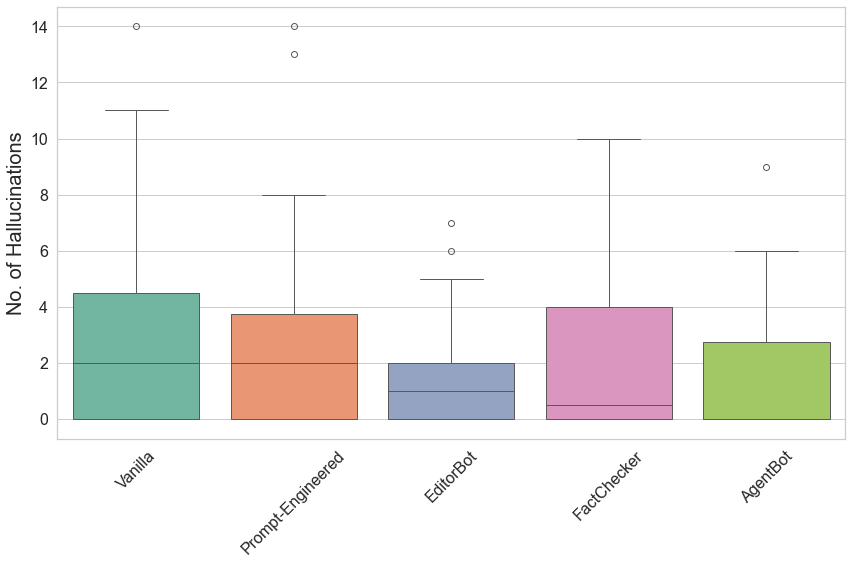

,Result_v0,Result_v1,Result_v2,Result_v3,Result_v4
0,2,2,0,4,0
1,0,1,2,3,2
2,0,0,2,0,2
3,0,1,0,10,0
4,1,8,5,0,0
5,0,2,0,0,3
6,2,4,1,7,0
7,5,0,0,0,0
8,0,2,0,3,0
9,6,3,4,0,6


In [80]:
import seaborn as sns

split_dfs = {version: data[data['Version'] == version].drop('Version', axis=1) .reset_index(drop=True)
             for version in data['Version'].unique()}
# Join the dataframes column-wise with suffixes based on 'Version' column
result_df = pd.concat(
    [split_dfs[version].add_suffix(f'_{version}') for version in split_dfs], axis=1
)
result_df = result_df[["Result_v0", "Result_v1", "Result_v2", "Result_v3", "Result_v4"]]
result_df = result_df.applymap(count_points)
import matplotlib.pyplot as plt

# Create box plots for each column in the dataframe
# Set the style for the plot
sns.set_theme(style="whitegrid")

# Create a single plot with all boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=result_df, palette="Set2")

# Set the title and labels
# plt.title("Comparison of Results Across Versions", fontsize=28)
plt.ylabel("No. of Hallucinations", fontsize=20)
# plt.xlabel("Versions", fontsize=20)

# Set x-axis tick labels to include version names and increase font size
plt.xticks(ticks=range(len(result_df.columns)), labels=[version_name.get(col[-2:], "Unknown") for col in result_df.columns], rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()
result_df

## HallucinationDetector

In [57]:
df = pd.read_csv('result_df_v1.csv', index_col=0)
df

,Chat,Turns,Result
0,﻿AI: Hi! I am your consumer grievance assistan...,"[{'context': ""\nDocument 0:\n3. The next step ...",Inconsistencies detected: Yes. \nThe following...
1,﻿AI: Hi! I am your consumer grievance assistan...,"[{'context': ""\nDocument 0:\ndearer to the...",Inconsistencies detected: Yes. \nThe followin...
2,﻿AI: Hi! I am your consumer grievance assistan...,"[{'context': '\nDocument 0:\nthis duty, leadin...",Inconsistencies detected: Yes.\nThe following ...
3,﻿AI: Hi! I am your consumer grievance assistan...,"[{'context': ""\nDocument 0:\ncomplainant and...",Inconsistencies detected: Yes.\nThe following ...
4,﻿AI: Hi! I am your consumer grievance assistan...,[{'context': '\nDocument 0:\nany harmful or to...,Inconsistencies detected: Yes. \nThe following...
...,...,...,...
110,﻿Consumer Grievance Redressal Chatbot: Hi! I a...,[],Inconsistencies detected: No.
111,﻿Human: i bought a stove 5 years ago and it st...,[],Inconsistencies detected: No.
112,﻿Consumer Grievance Redressal Chatbot: Hi! I a...,[],Inconsistencies detected: No.
113,﻿Consumer Grievance Redressal Chatbot: Hi! I a...,[],Inconsistencies detected: No.


In [67]:
for i, turn in enumerate(eval(df["Turns"].iloc[2])):
    print("Turn", i+1)
    for k, v in turn.items():
        print(k)
        print(v)
        print("**********************************************************************")

Turn 1
context

Document 0:
this duty, leading to a deficiency in service. The appeal was dismissed, affirming the hotel's negligence in the tragic incident.8. What is the format of the complaint to be made under this sector? https://cdrc.gujarat.gov .in/images/pdf/1-CC-Eng.pdf - DCDRC format. https://cdrc.gujarat.gov .in/images/pdf/1-CC-Eng.pdf - SCDRC format. https://ncdrc.nic.in/cc.html - NCDRC format.AIRLINES   SECT OR OVER VIEW In   the   previous   three   years,   the   aviation   industry   as   a   whole   has   seen   record-breaking   air   traffic   as   a   result   of   increased   airline   competition   to   draw   more   passengers   by   offering   discounts,   deals,   or   miles   or   by   providing   additional   air   services.   The   aviation   business   has   a   bright   future   because   of   the   sector's   development,   but   on   the   other   side,   consumer   safety   worries   have   increased.   According   to   official   data   and   sources,  

In [69]:
print(df["Chat"].iloc[2])

AI: Hi! I am your consumer grievance assistance tool. Kindly let me know how I can help you.


Human: My Uber showed my 250 as the rate while booking but charged me 400. I tried using the app's complaint mechanism and they are saying the cab probably took a longer route but it took the same way I do every day. what should I do?


AI: Thank you for sharing your concern with me. I'm here to help you with your consumer grievance.


To better understand the situation, can you please tell me what led to this issue? Was it a one-time incident or a recurring problem with Uber's pricing?


Human: It was a one time incident but it is a route i take everyday. 


AI: So it seems like the incident occurred on a route you regularly take, and the app initially quoted a lower fare but charged you a higher amount.


I would recommend filing a formal complaint with Uber through their official channels, as you've already done. However, if you're not satisfied with their response, you can also consider t